In [4]:
# import IMDB data set

import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# get np.load back
np.load = np_load_old

In [14]:
import random

print(train_data.shape)
print(train_labels.shape)


# lets revert one interger array back to review

word_index = imdb.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(' '.join([reversed_word_index.get(num - 3, '?') for num in train_data[0]]))
    


(25000,)
(25000,)
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have 

In [36]:
def vectorize_sequence(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [37]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000, ), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Create 10000 validation data from train_data
X_train_val = X_train[:10000]
X_train = X_train[10000:]
y_train_val = y_train[:10000]
y_train = y_train[10000:]

# Train model using fit method
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_train_val, y_train_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 485us/step - loss: 0.5340 - acc: 0.7874 - val_loss: 0.4141 - val_acc: 0.8578
Epoch 2/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.3285 - acc: 0.8995 - val_loss: 0.3164 - val_acc: 0.8873
Epoch 3/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.2330 - acc: 0.9241 - val_loss: 0.2976 - val_acc: 0.8852
Epoch 4/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1851 - acc: 0.9379 - val_loss: 0.2928 - val_acc: 0.8830
Epoch 5/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1510 - acc: 0.9529 - val_loss: 0.2800 - val_acc: 0.8886
Epoch 6/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.1268 - acc: 0.9603 - val_loss: 0.2904 - val_acc: 0.8880
Epoch 7/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.1040 - acc: 0.9701 - val_loss: 0.3012 - 

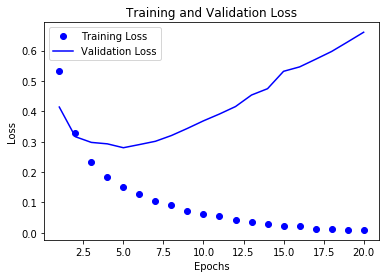

In [39]:
history_dict = history.history

# Plot Loss of training versus Validation
import matplotlib.pyplot as plt
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


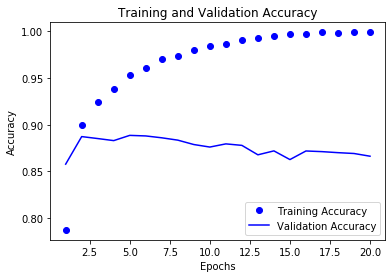

In [40]:
plt.clf()

# Plot accuracy values

train_acc = history_dict['acc']
validation_acc = history_dict['val_acc']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [42]:
# Evaluate model with test data

results = model.evaluate(X_test, y_test)
print(results)

25000/25000 [==============================] - 3s 139us/step
[0.7286522569584847, 0.84948]
